In [477]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score,roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA

In [35]:
#read the excel sheet

df = pd.read_excel('HCC excel 2023.xlsx')

In [36]:
# print the first 5 rows

df.head()

,group,RQmiR1298,RQmiR1262,RQmiR106b,RQmRNARAB11,RQSTAT,RQmRNAATG,RQLncWRAP,RQLncRNARP11513115,age,...,D.bilirubin,Albumin,INR,AFP,HCV.ABS,HBV.AG,Cirrhosis,BCLCstage,ChildPughGrade,Tumor.Size
0,Malignant (HCC),0.152618,0.697372,2.445281,657.114060,0.091505,14.420007,13.177456,124.499833,53.0,...,0.60,2.6,1.4,350.0,positive,negative,Cirrhosis,stage A,B8,2.6X2.4
1,Malignant (HCC),0.046007,0.441351,2.203810,2628.456238,0.346277,18.274532,15.348226,131.598570,60.0,...,0.60,3.2,1.2,600.8,positive,negative,Non-Cirrhosis,stage A,B8,1.5x2
2,Malignant (HCC),0.032084,0.231647,4.626753,6.105037,0.048698,1.035265,11.712686,101.125288,60.0,...,0.80,2.4,1.5,355.0,positive,negative,Cirrhosis,stage D,C10,3x2
3,Malignant (HCC),0.097261,0.246558,2.694467,3.630077,0.053290,0.939523,13.737047,25.634236,65.0,...,0.90,2.7,1.6,73.8,positive,negative,Cirrhosis,stage A,B8,4x3
4,Malignant (HCC),0.327145,0.524858,8.339726,3.680751,0.053660,0.223756,37.014022,119.428223,60.0,...,0.35,2.9,1.3,1200.0,positive,negative,Cirrhosis,stage A,B7,4x3


In [37]:
#print the last 5 rows

df.tail()

,group,RQmiR1298,RQmiR1262,RQmiR106b,RQmRNARAB11,RQSTAT,RQmRNAATG,RQLncWRAP,RQLncRNARP11513115,age,...,D.bilirubin,Albumin,INR,AFP,HCV.ABS,HBV.AG,Cirrhosis,BCLCstage,ChildPughGrade,Tumor.Size
214,healthy control,2.3,1.7,1.1,0.20,1.1,0.98,0.98,0.87,57.0,...,0.6,3.9,1.2,8.0,negative,negative,Non-Cirrhosis,NaN,NaN,NaN
215,healthy control,1.0,2.0,1.0,1.00,1.0,11.70,0.48,0.54,60.0,...,0.3,4.7,1.1,5.0,negative,negative,Non-Cirrhosis,NaN,NaN,NaN
216,healthy control,1.0,2.2,1.0,1.89,1.0,12.70,0.70,0.34,60.0,...,0.1,3.7,0.7,13.0,negative,negative,Non-Cirrhosis,NaN,NaN,NaN
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


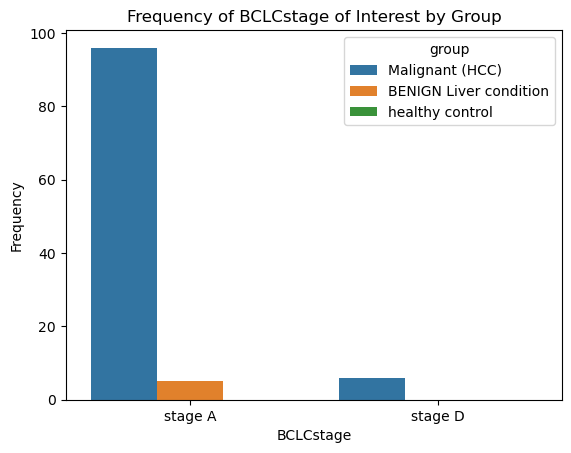

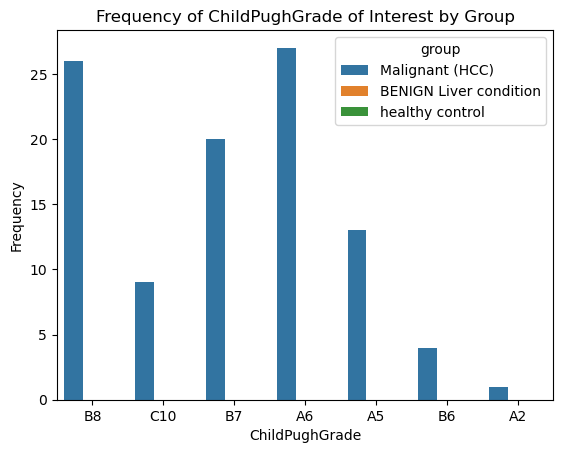

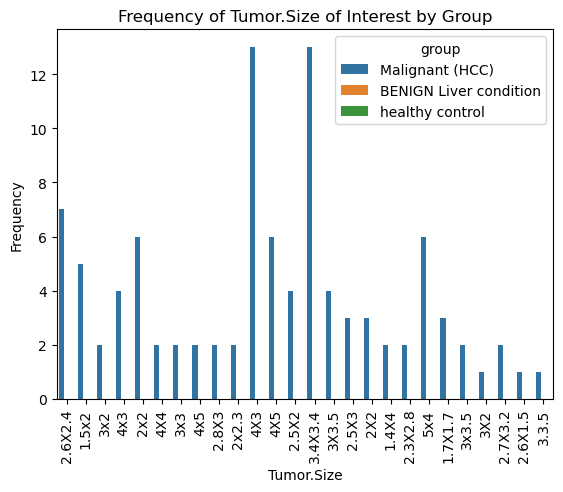

In [38]:
last_3_col = ['BCLCstage', 'ChildPughGrade', 'Tumor.Size']
for col in last_3_col:
    sns.countplot(x=col, hue='group', data=df)
    if col == 'Tumor.Size':
        plt.xticks(rotation=90)
    plt.title(f'Frequency of {col} of Interest by Group')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.savefig(f'Frequency of {col} of Interest by Group.png')
    plt.show()

In [39]:
#remove the last two rows as it is all nan values and not necessary

df = df.drop(index=[217,218])


#The data has lack of information in last 3 columns, there is no information about them in case of benign or healthy, so better drop them

df = df.drop(["BCLCstage", "ChildPughGrade", "Tumor.Size"], axis=1)
df.tail()

,group,RQmiR1298,RQmiR1262,RQmiR106b,RQmRNARAB11,RQSTAT,RQmRNAATG,RQLncWRAP,RQLncRNARP11513115,age,...,AST,ALT,T.bilirubin,D.bilirubin,Albumin,INR,AFP,HCV.ABS,HBV.AG,Cirrhosis
212,healthy control,1.0,1.0,0.100,1.00,0.100,17.70,0.55,0.76,59.0,...,29.0,32.0,1.540,0.5,4.3,0.8,9.0,negative,negative,Non-Cirrhosis
213,healthy control,1.0,1.8,0.234,0.30,0.234,4.90,0.86,0.23,56.0,...,16.0,20.0,2.200,0.6,5.0,1.1,9.0,negative,negative,Non-Cirrhosis
214,healthy control,2.3,1.7,1.100,0.20,1.100,0.98,0.98,0.87,57.0,...,18.0,28.0,1.000,0.6,3.9,1.2,8.0,negative,negative,Non-Cirrhosis
215,healthy control,1.0,2.0,1.000,1.00,1.000,11.70,0.48,0.54,60.0,...,16.0,19.0,0.765,0.3,4.7,1.1,5.0,negative,negative,Non-Cirrhosis
216,healthy control,1.0,2.2,1.000,1.89,1.000,12.70,0.70,0.34,60.0,...,10.0,31.0,0.500,0.1,3.7,0.7,13.0,negative,negative,Non-Cirrhosis


In [40]:
# show statistical describtions of the data

df.describe()

,RQmiR1298,RQmiR1262,RQmiR106b,RQmRNARAB11,RQSTAT,RQmRNAATG,RQLncWRAP,RQLncRNARP11513115,age,AST,ALT,T.bilirubin,D.bilirubin,Albumin,INR,AFP
count,217.000000,217.000000,217.000000,2.170000e+02,217.000000,217.000000,217.000000,217.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,214.000000
mean,4.819889,4.711627,26.664873,2.018319e+04,0.686805,208.765081,1633.239835,40.992973,56.949074,27.146296,56.580556,6.849833,1.863472,2.356481,2.313426,120.475047
std,11.051431,11.821789,114.485184,2.188484e+05,0.500463,789.625551,19154.465853,84.808809,6.548012,40.807424,36.510439,14.129344,2.384609,2.099473,0.969085,407.303333
min,0.010000,0.001084,0.000000,1.335808e-04,0.000000,0.000171,0.000000,0.006956,37.000000,2.000000,11.000000,0.500000,0.050000,0.050000,0.700000,0.900000
25%,0.389043,0.156041,0.780000,5.600000e-01,0.253490,1.658639,0.700000,0.760000,53.000000,2.000000,32.750000,1.100000,0.600000,0.800000,1.315000,1.200000
50%,1.000000,0.840896,2.479415,3.182146e+00,0.659754,15.562479,2.265768,1.931873,57.000000,2.000000,44.000000,1.800000,1.200000,2.100000,2.700000,1.425000
75%,3.244509,3.200000,10.556063,4.050421e+01,1.000000,59.301636,33.128478,40.504211,61.000000,40.000000,73.475000,3.100000,2.125000,3.100000,3.100000,10.950000
max,66.700000,87.000000,1167.400000,3.178688e+06,2.207043,6793.785719,273276.144410,797.864530,82.000000,218.000000,268.000000,77.000000,12.200000,10.200000,4.300000,3224.000000


In [41]:
# show the number of non-Null values and data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   group               217 non-null    object 
 1   RQmiR1298           217 non-null    float64
 2   RQmiR1262           217 non-null    float64
 3   RQmiR106b           217 non-null    float64
 4   RQmRNARAB11         217 non-null    float64
 5   RQSTAT              217 non-null    float64
 6   RQmRNAATG           217 non-null    float64
 7   RQLncWRAP           217 non-null    float64
 8   RQLncRNARP11513115  217 non-null    float64
 9   age                 216 non-null    float64
 10  sex                 216 non-null    object 
 11  smoking             216 non-null    object 
 12  AST                 216 non-null    float64
 13  ALT                 216 non-null    float64
 14  T.bilirubin         216 non-null    float64
 15  D.bilirubin         216 non-null    float64
 16  Albumin 

In [42]:
# check the total null values of each column in the dataset
df.isnull().sum()

group                 0
RQmiR1298             0
RQmiR1262             0
RQmiR106b             0
RQmRNARAB11           0
RQSTAT                0
RQmRNAATG             0
RQLncWRAP             0
RQLncRNARP11513115    0
age                   1
sex                   1
smoking               1
AST                   1
ALT                   1
T.bilirubin           1
D.bilirubin           1
Albumin               1
INR                   1
AFP                   3
HCV.ABS               3
HBV.AG                3
Cirrhosis             2
dtype: int64

In [43]:
# Remove missing values in all columns except the label column

for col in df.columns:
    if df[col].dtype == 'O' and df[col].isna().sum() != 0:
        df[col].fillna(df[col].mode().iloc[0], inplace=True)
    elif df[col].dtype == 'float64' and df[col].isna().sum() != 0:
        df[col].fillna(df[col].mean(), inplace=True)

In [44]:
# Check the missing values

df.isnull().sum()

group                 0
RQmiR1298             0
RQmiR1262             0
RQmiR106b             0
RQmRNARAB11           0
RQSTAT                0
RQmRNAATG             0
RQLncWRAP             0
RQLncRNARP11513115    0
age                   0
sex                   0
smoking               0
AST                   0
ALT                   0
T.bilirubin           0
D.bilirubin           0
Albumin               0
INR                   0
AFP                   0
HCV.ABS               0
HBV.AG                0
Cirrhosis             0
dtype: int64

In [45]:
# check the actual type of HCV.ABS column

print(pd.api.types.infer_dtype(df['HCV.ABS']))

mixed-integer


In [46]:
df['HCV.ABS'].values

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 350, 10.8, 355, 73.8, 1200, 136, 20.5, 4, 1985, 23.4,
       73, 2.3, 2.9, 3224, 468, 10, 6.7, 3.3, 22, 6, 33, 11, 8.2, 21,
       24.8, 3.3, 52.2, 189, 206, 6.7, 3.3, 22, 6, 33

In [47]:
# convert HCV.ABS to float, as it can't be of two data type
df['HCV.ABS'] = df['HCV.ABS'].replace({'positive': 0, 'negative': 1})

In [48]:
df.head()

,group,RQmiR1298,RQmiR1262,RQmiR106b,RQmRNARAB11,RQSTAT,RQmRNAATG,RQLncWRAP,RQLncRNARP11513115,age,...,AST,ALT,T.bilirubin,D.bilirubin,Albumin,INR,AFP,HCV.ABS,HBV.AG,Cirrhosis
0,Malignant (HCC),0.152618,0.697372,2.445281,657.114060,0.091505,14.420007,13.177456,124.499833,53.0,...,100.0,63.0,1.50,0.60,2.6,1.4,350.0,0.0,negative,Cirrhosis
1,Malignant (HCC),0.046007,0.441351,2.203810,2628.456238,0.346277,18.274532,15.348226,131.598570,60.0,...,58.0,43.0,1.30,0.60,3.2,1.2,600.8,0.0,negative,Non-Cirrhosis
2,Malignant (HCC),0.032084,0.231647,4.626753,6.105037,0.048698,1.035265,11.712686,101.125288,60.0,...,103.8,73.3,1.50,0.80,2.4,1.5,355.0,0.0,negative,Cirrhosis
3,Malignant (HCC),0.097261,0.246558,2.694467,3.630077,0.053290,0.939523,13.737047,25.634236,65.0,...,39.0,31.0,1.76,0.90,2.7,1.6,73.8,0.0,negative,Cirrhosis
4,Malignant (HCC),0.327145,0.524858,8.339726,3.680751,0.053660,0.223756,37.014022,119.428223,60.0,...,60.0,32.0,1.00,0.35,2.9,1.3,1200.0,0.0,negative,Cirrhosis


In [49]:
print(pd.api.types.infer_dtype(df['HCV.ABS']))

floating


In [50]:
df['HCV.ABS'].values

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       1.000e+00, 3.500e+02, 1.080e+01, 3.550e+02, 7.380e+01, 1.200e+03,
       1.360e+02, 2.050e+01, 4.000e+00, 1.985e+03, 2.340e+01, 7.300e+01,
       2.300e+00, 2.900e+00, 3.224e+03, 4.680e+02, 1.000e+01, 6.700e+00,
       3.300e+00, 2.200e+01, 6.000e+00, 3.300e+01, 

In [51]:
# Save the clean dataset

df.to_excel('clean_df.xlsx', index=False)

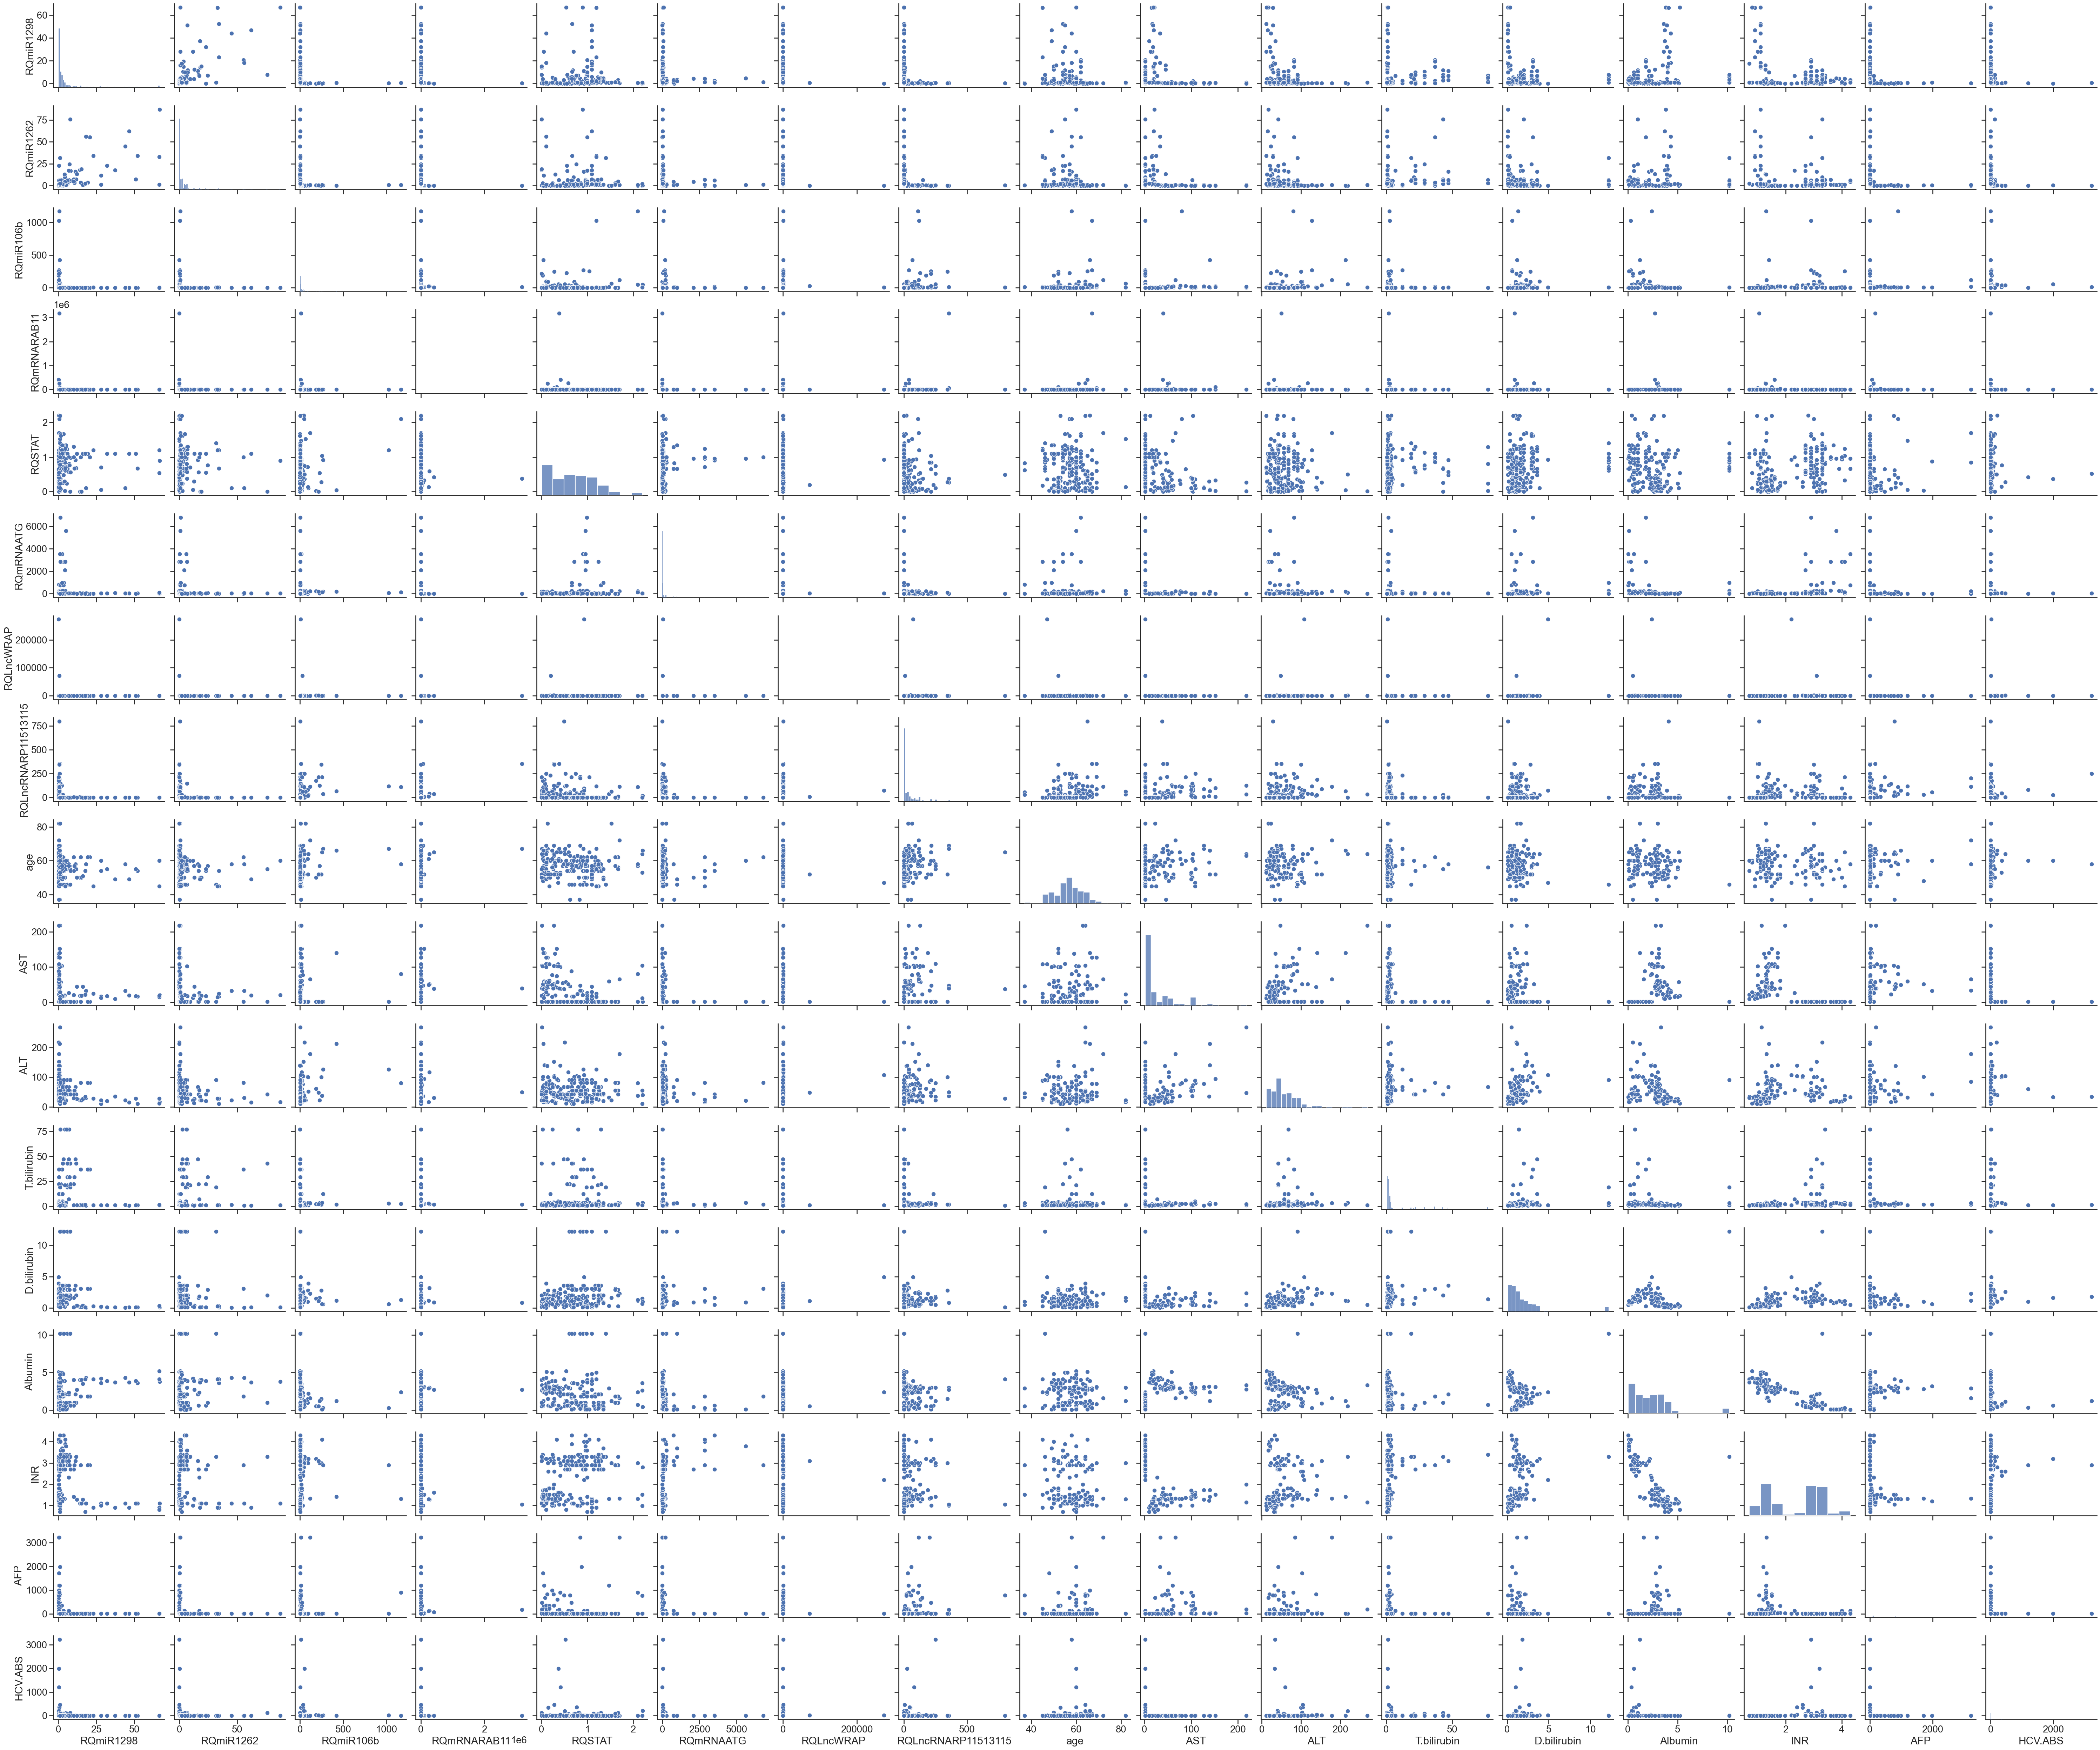

In [25]:
# visualize the pairwise relationships between different variables in a dataset o quickly identify any patterns or relationships between variables in dataset.
sns.set(style="ticks")
sns.set_context("talk", font_scale=1.2)
sns_plot = sns.pairplot(df, height=3, aspect=1.2)
# Save the plot to a file
sns_plot.savefig("pairplot.png",  dpi=300)
plt.show()

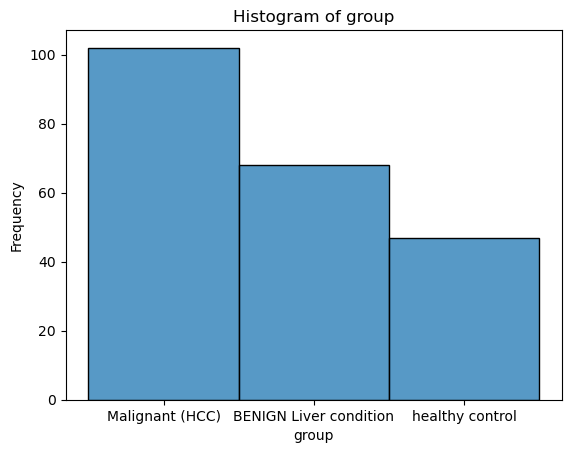

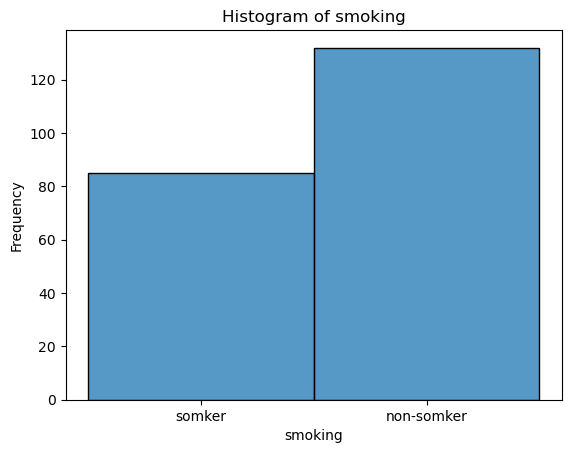

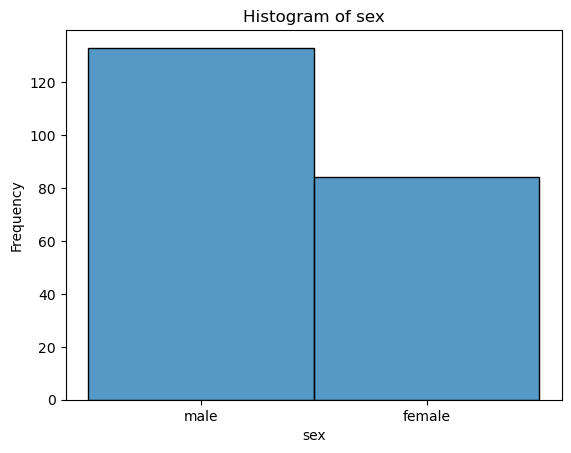

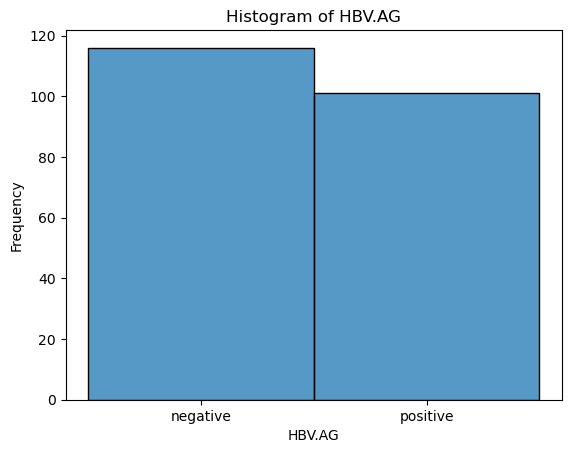

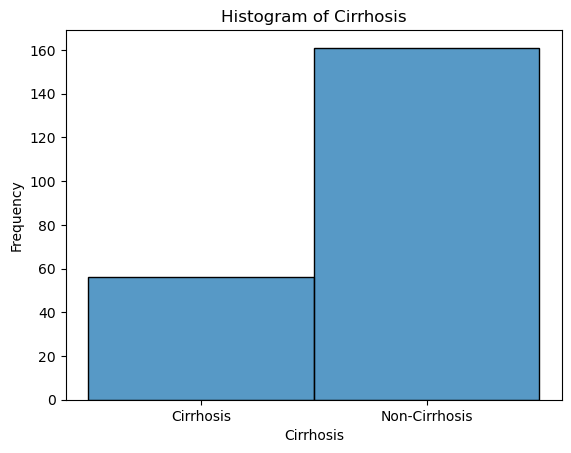

In [52]:
cat_data = ['group','smoking', 'sex', 'HBV.AG', 'Cirrhosis']
cat_data = df[cat_data]
for column in cat_data.columns:
    sns.histplot(cat_data[column], kde=False)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.savefig(f'{column}_histogram.png')
    plt.show()

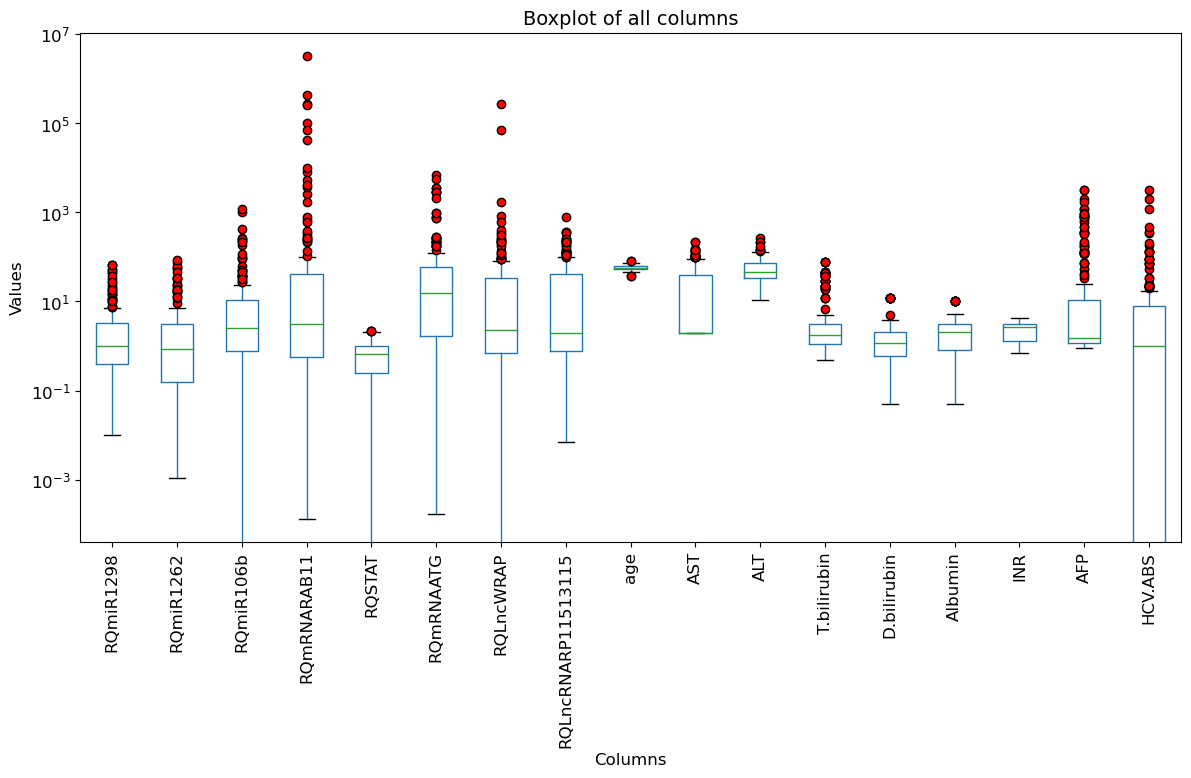

In [76]:
numerical_col = ['RQmiR1298', 'RQmiR1262', 'RQmiR106b', 'RQmRNARAB11', 'RQSTAT', 'RQmRNAATG', 'RQLncWRAP', 'RQLncRNARP11513115', 'age', 'AST', 'ALT', 'T.bilirubin', 'D.bilirubin', 'Albumin', 'INR', 'AFP', 'HCV.ABS']
numerical_col = df[numerical_col]
# Create a boxplot for all columns in the DataFrame
fig, ax = plt.subplots(figsize=(12,8))
red_circle = dict(markerfacecolor='red', marker='o')
numerical_col.boxplot(ax=ax, grid=False, fontsize=12, rot=90, flierprops=red_circle)

# Set the title and axis labels
ax.set_title('Boxplot of all columns',fontsize=14)
ax.set_xlabel('Columns',fontsize=12)
ax.set_ylabel('Values',fontsize=12)
fig.tight_layout(pad=1.5)
# Show the plot
plt.semilogy()
plt.savefig("Boxplot.png", dpi=300)


In [79]:
# get the names of categorical features

cat_col = {}
for col in df.columns:
    if df[col].dtype == 'O':
        cat_col[col] = df[col].unique()
print(cat_col)

{'group': array(['Malignant (HCC)', 'BENIGN Liver condition', 'healthy control'],
      dtype=object), 'sex': array(['male', 'female'], dtype=object), 'smoking': array(['somker', 'non-somker'], dtype=object), 'HBV.AG': array(['negative', 'positive'], dtype=object), 'Cirrhosis': array(['Cirrhosis', 'Non-Cirrhosis'], dtype=object)}


In [80]:
label_cat = ['sex', 'smoking' ,'HBV.AG', 'Cirrhosis']

In [81]:
# encode the categorical features

enc = OrdinalEncoder()
df[label_cat] = enc.fit_transform(df[label_cat])

In [82]:
# encode the label

df['group'] = df['group'].replace({'Malignant (HCC)': 0, 'BENIGN Liver condition': 1, 'healthy control':2})

In [83]:
#Feature feature correlation
#used pearson correlation

# Calculate the correlation matrix
corr_matrix = df.corr()

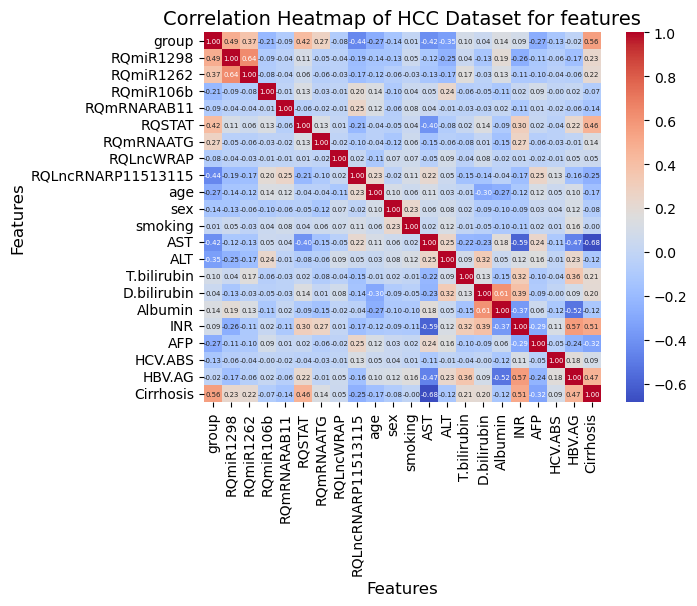

In [130]:


# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"fontsize":5})

# Set the title and axis labels
plt.title('Correlation Heatmap of HCC Dataset for features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('heatmap.png')
# Show the plot
plt.show()

In [100]:
# Compute the correlation coefficients and p-values for pearson corerelation
corr_with_target = {}
for col in df.columns:
    if col != 'group':
        corr, p_val = pearsonr(df[col], df['group'])
        corr_with_target[col] = (corr, p_val)

# Print the correlation coefficients and p-values
for col, (corr, p_val) in sorted(corr_with_target.items(), key=lambda x: x[1][0], reverse=True):
    print(f"{col}: correlation={corr:.2f}, p-value={p_val:.4f}")

Cirrhosis: correlation=0.56, p-value=0.0000
RQmiR1298: correlation=0.49, p-value=0.0000
RQSTAT: correlation=0.42, p-value=0.0000
RQmiR1262: correlation=0.37, p-value=0.0000
RQmRNAATG: correlation=0.27, p-value=0.0000
Albumin: correlation=0.14, p-value=0.0445
T.bilirubin: correlation=0.10, p-value=0.1497
INR: correlation=0.09, p-value=0.1773
D.bilirubin: correlation=0.04, p-value=0.5107
smoking: correlation=0.01, p-value=0.9241
HBV.AG: correlation=-0.02, p-value=0.8101
RQLncWRAP: correlation=-0.08, p-value=0.2359
RQmRNARAB11: correlation=-0.09, p-value=0.1994
HCV.ABS: correlation=-0.13, p-value=0.0577
sex: correlation=-0.14, p-value=0.0464
RQmiR106b: correlation=-0.21, p-value=0.0019
AFP: correlation=-0.27, p-value=0.0000
age: correlation=-0.27, p-value=0.0000
ALT: correlation=-0.35, p-value=0.0000
AST: correlation=-0.42, p-value=0.0000
RQLncRNARP11513115: correlation=-0.44, p-value=0.0000


In [109]:
def custom_score(X, y):
    scores = []
    for i in range(X.shape[1]):
        corr, p = pearsonr(X[:, i], y)
        corr_abs = abs(corr)
        score = corr_abs * (1 - p)
        scores.append(score)
    return scores, None

In [118]:
# Use cfs method

# create the SelectKBest object to select the top 5 features using cfs
selector = SelectKBest(score_func=custom_score, k=10)
X = df.iloc[:,1:]
y = df.iloc[:,0]

print(X.shape) # should print (217, 21)
print(y.shape) # should print (217,)
# fit the selector to the data and transform the data to select the top 5 features
X_new = selector.fit_transform(X, y)

# get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# get the names of the selected features
selected_features_names = X.columns[selected_features_indices]

print(selected_features_names)

selected_features_scores = selector.scores_[selected_features_indices]
print(selected_features_scores)

(217, 21)
(217,)
Index(['RQmiR1298', 'RQmiR1262', 'RQSTAT', 'RQmRNAATG', 'RQLncRNARP11513115',
       'age', 'AST', 'ALT', 'AFP', 'Cirrhosis'],
      dtype='object')
[0.49230037 0.37497906 0.41550502 0.27227125 0.44297653 0.27494592
 0.41539265 0.34693357 0.27182065 0.5580884 ]


In [153]:
#selected features using pearson
X_pearson = df[selected_features_names]
y_pearson = df['group']

In [139]:
# Compute the correlation coefficients and p-values using fisher
fishCorr_with_target = {}
for col in df.columns:
    if col != 'group':
        corr, p_val = pearsonr(df[col], df['group'])
        # Perform Fisher transformation
        z = 0.5 * np.log((1 + corr) / (1 - corr))
        n = len(df[col])  # Number of observations
        p_value_fisher = 2 * (1 - stats.t.cdf(abs(z), n - 2))
        fishCorr_with_target[col] = (z, p_value_fisher)

# Print the correlation coefficients and p-values
for col, (f_val, p_val) in sorted(fishCorr_with_target.items(), key=lambda x: x[1][0], reverse=True):
    print(f"{col}: F-value={f_val:.2f}, p-value={p_val:.4f}")

Cirrhosis: F-value=0.63, p-value=0.5293
RQmiR1298: F-value=0.54, p-value=0.5904
RQSTAT: F-value=0.44, p-value=0.6588
RQmiR1262: F-value=0.39, p-value=0.6938
RQmRNAATG: F-value=0.28, p-value=0.7803
Albumin: F-value=0.14, p-value=0.8908
T.bilirubin: F-value=0.10, p-value=0.9217
INR: F-value=0.09, p-value=0.9266
D.bilirubin: F-value=0.04, p-value=0.9642
smoking: F-value=0.01, p-value=0.9948
HBV.AG: F-value=-0.02, p-value=0.9869
RQLncWRAP: F-value=-0.08, p-value=0.9355
RQmRNARAB11: F-value=-0.09, p-value=0.9302
HCV.ABS: F-value=-0.13, p-value=0.8969
sex: F-value=-0.14, p-value=0.8918
RQmiR106b: F-value=-0.21, p-value=0.8319
AFP: F-value=-0.28, p-value=0.7806
age: F-value=-0.28, p-value=0.7780
ALT: F-value=-0.36, p-value=0.7177
AST: F-value=-0.44, p-value=0.6589
RQLncRNARP11513115: F-value=-0.48, p-value=0.6346


In [136]:
def fish(X, y):
    scores = []
    for i in range(X.shape[1]):
        corr, p = pearsonr(X[:, i], y)
        # Perform Fisher transformation
        z = 0.5 * np.log((1 + corr) / (1 - corr))
        n = len(X[:, i])  # Number of observations
        p_fisher = 2 * (1 - stats.t.cdf(abs(z), n - 2))
        score = abs(z) * (1 - p_fisher)
        scores.append(score)
    return scores, None

In [492]:
# create the SelectKBest object to select the top 7 features using cfs
fselector = SelectKBest(score_func=fish, k=7)
X = df.iloc[:,1:]
y = df.iloc[:,0]

print(X.shape) # should print (217, 21)
print(y.shape) # should print (217,)
# fit the selector to the data and transform the data to select the top 5 features
X_new = fselector.fit_transform(X, y)

# get the indices of the selected features
fish_selected_features_indices = fselector.get_support(indices=True)

# get the names of the selected features
fish_selected_features_names = X.columns[fish_selected_features_indices]

print(fish_selected_features_names)

fish_selected_features_scores = fselector.scores_[fish_selected_features_indices]
print(fish_selected_features_scores)

(217, 21)
(217,)
Index(['RQmiR1298', 'RQmiR1262', 'RQSTAT', 'RQLncRNARP11513115', 'AST', 'ALT',
       'Cirrhosis'],
      dtype='object')
[0.22082227 0.12069712 0.15091439 0.17389982 0.15082467 0.10216421
 0.29654732]


In [493]:
#selected features using fisher
X_fish = df[fish_selected_features_names]

In [155]:
#features without feature selection
X = df.drop('group', axis=1)

In [143]:
# encode the label
y = y.replace({'Malignant (HCC)': 0, 'BENIGN Liver condition': 1, 'healthy control':2})

In [151]:
# normalize the data
def standardize(x):
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    return x, scaler

In [156]:
X, scaler = standardize(X)
X_pearson, p_scaler = standardize(X_pearson)

In [496]:
X_fish, f_scaler = standardize(X_fish)

In [384]:
def train_kfold(model,x,y):
    kf = KFold(n_splits=5, shuffle=True)
    i = 1
    accuracy_arr = []
    fbeta_arr = []
    precision_arr = []
    recall_arr = []
    true_labels = []
    predicted_labels = []
    # Iterate over each fold
    for train_idx, test_idx in kf.split(x):
        # Split the data into training and testing sets
        X_train, y_train = x[train_idx], y[train_idx]
        X_test, y_test = x[test_idx], y[test_idx]
        # Train the model on the training data
        model.fit(X_train, y_train)
        # Predict the target variable on the testing data
        y_pred = model.predict(X_test)
        y_score = model.predict_proba(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        fbeta = fbeta_score(y_test, y_pred, beta=0.5, average='macro')
        precision = precision_score(y_test, y_pred,average='macro')
        recall = recall_score(y_test, y_pred,average='macro')
        accuracy_arr.append(accuracy)
        fbeta_arr.append(fbeta)
        precision_arr.append(precision)
        recall_arr.append(recall)
        true_labels.extend(y_test)
        predicted_labels.extend(y_pred)
        
    average_accuracy = round(sum(accuracy_arr) / len(accuracy_arr), 2)
    average_fbeta = round(sum(fbeta_arr) / len(fbeta_arr),2)
    average_precision = round(sum(precision_arr) / len(precision_arr),2)
    average_recall = round(sum(recall_arr) / len(recall_arr),2)
    report = classification_report(true_labels, predicted_labels)
    return average_accuracy,average_fbeta,average_precision,average_recall, model, report, y_test, y_score, true_labels, predicted_labels

In [385]:
def extract_accuracy(report):
    accuracy_by_class = {}
    lines = report.split('\n')
    for line in lines[2:5]:
        class_name, precision, recall, f1_score, support = line.split()
        if class_name == "0":
            class_name = "Malignant"
        elif class_name == "1":
            class_name = "Benign"
        else:
            class_name = "Healthy"
        accuracy = float(precision) * float(support) / (float(precision) * float(support) + float(1 - float(precision)) * float(support))
        accuracy_by_class[class_name] = accuracy
    return accuracy_by_class

In [386]:
def ROC_curve(model, y_test, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each individual class
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i, color in zip(range(len(model.classes_)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(model.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for multi-class classification using one-vs-all')
    plt.legend(loc="lower right")
    plt.savefig('ROC curve.png')
    plt.show()

In [392]:
# 1- Naive Bayes
nb = GaussianNB()
nb = OneVsRestClassifier(nb)
average_accuracy_nb,average_fbeta_nb,average_precision_nb,average_recall_nb, nb, nb_report,y_test_nb, y_score_nb,true_labels_nb, predicted_labels_nb = train_kfold(nb,X, y)

In [393]:
print(average_accuracy_nb,average_fbeta_nb,average_precision_nb,average_recall_nb)

0.95 0.95 0.95 0.95


In [394]:
print(extract_accuracy(nb_report))

{'Malignant': 0.97, 'Benign': 0.94, 'Healthy': 0.93}


In [426]:
#2- KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn = OneVsRestClassifier(knn)
average_accuracy_knn,average_fbeta_knn,average_precision_knn,average_recall_knn, knn, knn_report,y_test_knn, y_score_knn,true_labels_knn, predicted_labels_knn = train_kfold(knn,X, y)

In [427]:
print(average_accuracy_knn,average_fbeta_knn,average_precision_knn,average_recall_knn)

0.82 0.81 0.82 0.83


In [428]:
print(extract_accuracy(knn_report))

{'Malignant': 0.96, 'Benign': 0.75, 'Healthy': 0.71}


In [453]:
#3- Decision Tree
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=0.5)
dt = OneVsRestClassifier(dt)
average_accuracy_dt,average_fbeta_dt,average_precision_dt,average_recall_dt, dt,dt_report, y_test_dt, y_score_dt, true_labels_dt, predicted_labels_dt = train_kfold(dt,X, y)

In [454]:
print(average_accuracy_dt,average_fbeta_dt,average_precision_dt,average_recall_dt)

0.86 0.84 0.86 0.83


In [455]:
print(extract_accuracy(dt_report))

{'Malignant': 0.92, 'Benign': 0.83, 'Healthy': 0.74}


In [456]:
#4- Random forest
rf = RandomForestClassifier()
rf = OneVsRestClassifier(rf)
average_accuracy_rf,average_fbeta_rf,average_precision_rf,average_recall_rf, rf, rf_report, y_test_rf, y_score_rf,true_labels_rf, predicted_labels_rf = train_kfold(rf,X, y)

In [457]:
print(average_accuracy_rf,average_fbeta_rf,average_precision_rf,average_recall_rf)

0.96 0.95 0.96 0.95


In [458]:
print(extract_accuracy(rf_report))

{'Malignant': 1.0, 'Benign': 0.92, 'Healthy': 0.95}


In [459]:
#5- Adaboost
ab = AdaBoostClassifier(n_estimators=10, learning_rate=0.1)
ab  = OneVsRestClassifier(ab)
average_accuracy_ab,average_fbeta_ab,average_precision_ab,average_recall_ab, ab, ab_report, y_test_ab, y_score_ab,true_labels_ab, predicted_labels_ab = train_kfold(ab,X, y)

In [460]:
print(average_accuracy_ab,average_fbeta_ab,average_precision_ab,average_recall_ab)

0.91 0.89 0.9 0.88


In [461]:
print(extract_accuracy(ab_report))

{'Malignant': 0.95, 'Benign': 0.84, 'Healthy': 0.95}


In [462]:
accuracy = [average_accuracy_knn, average_accuracy_rf, average_accuracy_nb, average_accuracy_dt, average_accuracy_ab]
F_score = [average_fbeta_knn, average_fbeta_rf, average_fbeta_nb, average_fbeta_dt, average_fbeta_ab]
precision = [average_precision_knn, average_precision_rf, average_precision_nb, average_precision_dt, average_precision_ab]
recall = [average_recall_knn, average_recall_rf, average_recall_nb, average_recall_dt, average_recall_ab]

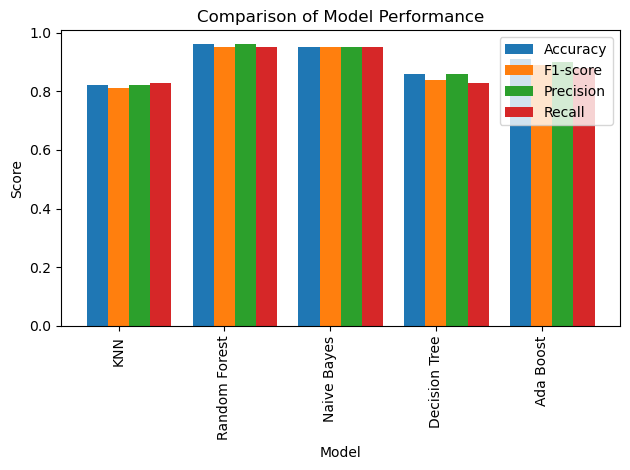

In [463]:
model_names = ['KNN', 'Random Forest', 'Naive Bayes', 'Decision Tree', 'Ada Boost']
# Set up the x-axis values
x = np.arange(len(model_names))

# Define the width of each bar
bar_width = 0.2

# Create a grouped bar chart of the accuracy and F1-score for each model
fig, ax = plt.subplots()
rects1 = ax.bar(x - bar_width, accuracy, bar_width, label='Accuracy')
rects2 = ax.bar(x, F_score, bar_width, label='F1-score')
rects3 = ax.bar(x + bar_width, precision, bar_width, label='Precision')
rects4 = ax.bar(x + 2 * bar_width, recall, bar_width, label='Recall')

# Add axis labels and a plot title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance')

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=90)
plt.tight_layout()
# Add a legend
ax.legend()
plt.savefig('Models Performance.png', dpi=300)
# Show the plot
plt.show()

In [464]:
#save the models
pickle.dump(nb, open('model_Naive_allfeatures.pkl', 'wb'))
pickle.dump(ab, open('model_ADABoost_allfeatures.pkl', 'wb'))
pickle.dump(dt, open('model_DecisionTree_allfeatures.pkl', 'wb'))
pickle.dump(rf, open('model_RandomForest_allfeatures.pkl', 'wb'))
pickle.dump(knn, open('model_KNN_allfeatures.pkl', 'wb'))

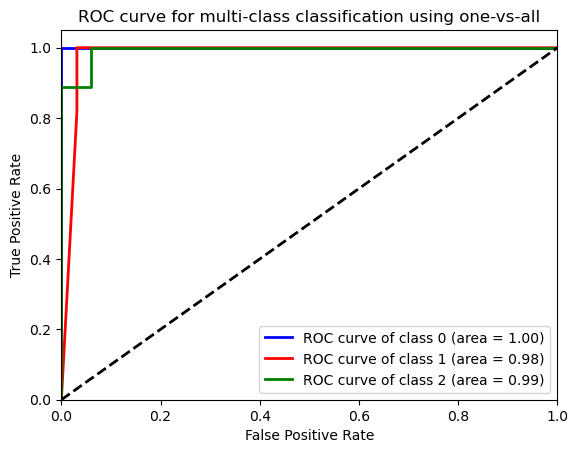

In [465]:
ROC_curve(nb, y_test_nb, y_score_nb)

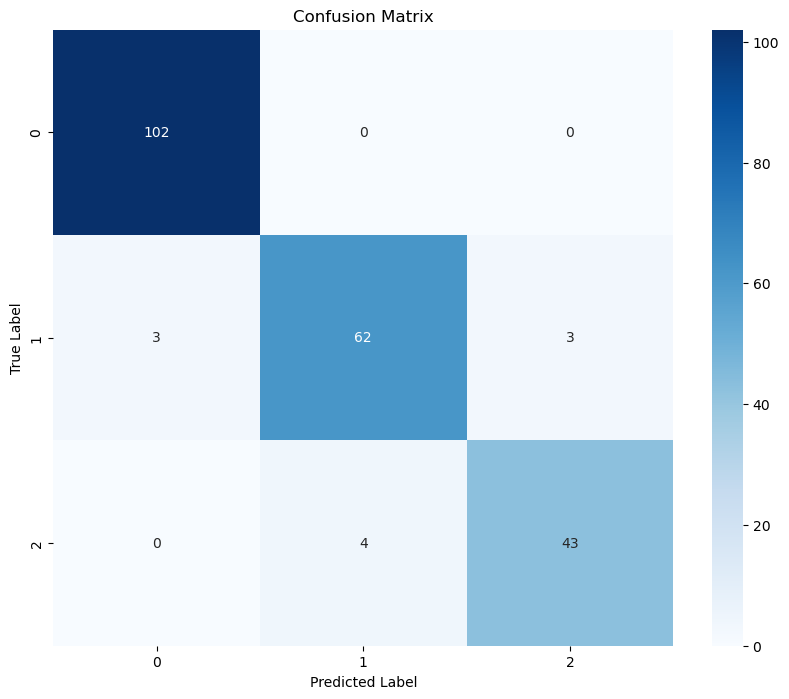

In [466]:
cm = confusion_matrix(true_labels_nb, predicted_labels_nb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.savefig("confusion matrix.png")
plt.show()

In [467]:
# Train pearson features
#1- Random forest
rf_p = RandomForestClassifier()
rf_p = OneVsRestClassifier(rf_p)
average_accuracy_rf_p,average_fbeta_rf_p,average_precision_rf_p,average_recall_rf_p, rf_p, rf_p_report, y_test_rf_p, y_score_rf_p,true_labels_rf_p, predicted_labels_rf_p = train_kfold(rf_p,X_pearson, y)

In [468]:
print(average_accuracy_rf_p,average_fbeta_rf_p,average_precision_rf_p,average_recall_rf_p)

0.94 0.94 0.94 0.93


In [518]:
# Train fisher features
rf_f = RandomForestClassifier()
rf_f = OneVsRestClassifier(rf_f)
average_accuracy_rf_f,average_fbeta_rf_f,average_precision_rf_f,average_recall_rf_f, rf_f, rf_f_report, y_test_rf_f, y_score_rf_f,true_labels_rf_f, predicted_labels_rf_f = train_kfold(rf_f,X_fish, y)

In [519]:
print(average_accuracy_rf_f,average_fbeta_rf_f,average_precision_rf_f,average_recall_rf_f)

0.97 0.96 0.97 0.96


In [471]:
# Train pearson features
# 2- Naive Bayes
nb_p = GaussianNB()
nb_p = OneVsRestClassifier(nb_p)
average_accuracy_nb_p,average_fbeta_nb_p,average_precision_nb_p,average_recall_nb_p, nb_p, nb_p_report,y_test_nb_p, y_score_nb_p,true_labels_nb_p, predicted_labels_nb_p = train_kfold(nb_p,X_pearson, y)

In [472]:
print(average_accuracy_nb_p,average_fbeta_nb_p,average_precision_nb_p,average_recall_nb_p)

0.85 0.82 0.83 0.84


In [499]:
# Train fisher features
nb_f = GaussianNB()
nb_f = OneVsRestClassifier(nb_f)
average_accuracy_nb_f,average_fbeta_nb_f,average_precision_nb_f,average_recall_nb_f, nb_f, nb_f_report,y_test_nb_f, y_score_nb_f,true_labels_nb_f, predicted_labels_nb_f = train_kfold(nb_f,X_fish, y)

In [500]:
print(average_accuracy_nb_f,average_fbeta_nb_f,average_precision_nb_f,average_recall_nb_f)

0.84 0.82 0.84 0.8


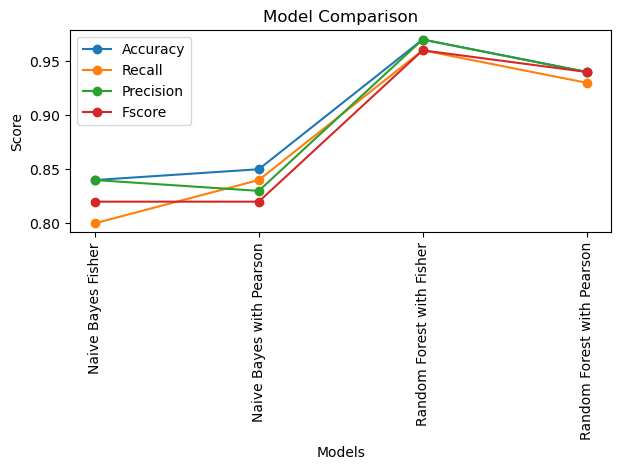

In [534]:
# Plot the line chart
x = ['Naive Bayes Fisher', 'Naive Bayes with Pearson', 'Random Forest with Fisher', 'Random Forest with Pearson']
accuracy = [average_accuracy_nb_f, average_accuracy_nb_p, average_accuracy_rf_f, average_accuracy_rf_p]
recall = [average_recall_nb_f, average_recall_nb_p, average_recall_rf_f, average_recall_rf_p]
precision = [average_precision_nb_f, average_precision_nb_p, average_precision_rf_f, average_precision_rf_p]
fscore = [average_fbeta_nb_f, average_fbeta_nb_p, average_fbeta_rf_f,average_fbeta_rf_p]
plt.plot(x, accuracy, marker='o',  label='Accuracy')
plt.plot(x, recall, marker='o',  label='Recall')
plt.plot(x, precision, marker='o',  label='Precision')
plt.plot(x, fscore, marker='o',  label='Fscore')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('models_featuresel_per.png', dpi=300)
plt.show()

In [501]:
#save the models
pickle.dump(nb_p, open('model_Naive_pearsonfeatures.pkl', 'wb'))
pickle.dump(nb_f, open('model_Naive_fisherfeatures.pkl', 'wb'))
pickle.dump(rf_p, open('model_RandomForest_pearsonfeatures.pkl', 'wb'))
pickle.dump(rf_f, open('model_RandomForest_fisherfeatures.pkl', 'wb'))

In [478]:
pca_p = PCA(n_components=5)
x_pca_p = pca_p.fit_transform(X_pearson)

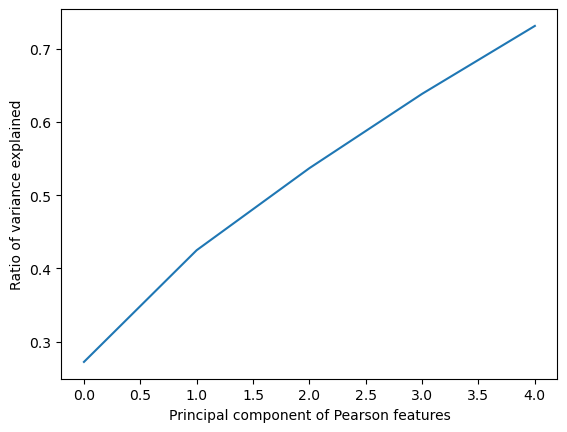

In [480]:
# Investigate the variance accounted for by each principal component.
plt.plot(range(len(pca_p.explained_variance_ratio_)),np.cumsum(pca_p.explained_variance_ratio_))
plt.xlabel("Principal component of Pearson features")
plt.ylabel("Ratio of variance explained")
plt.savefig("PCA pearson.png")
plt.show()

In [502]:
pca_f = PCA(n_components=5)
x_pca_f = pca_f.fit_transform(X_fish)

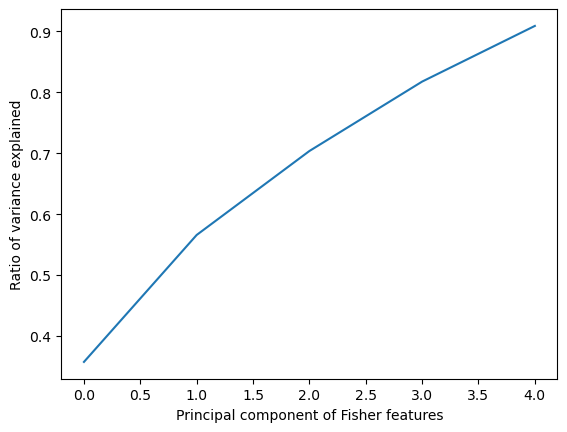

In [503]:
# Investigate the variance accounted for by each principal component.
plt.plot(range(len(pca_f.explained_variance_ratio_)),np.cumsum(pca_f.explained_variance_ratio_))
plt.xlabel("Principal component of Fisher features")
plt.ylabel("Ratio of variance explained")
plt.savefig("PCA fisher.png")
plt.show()

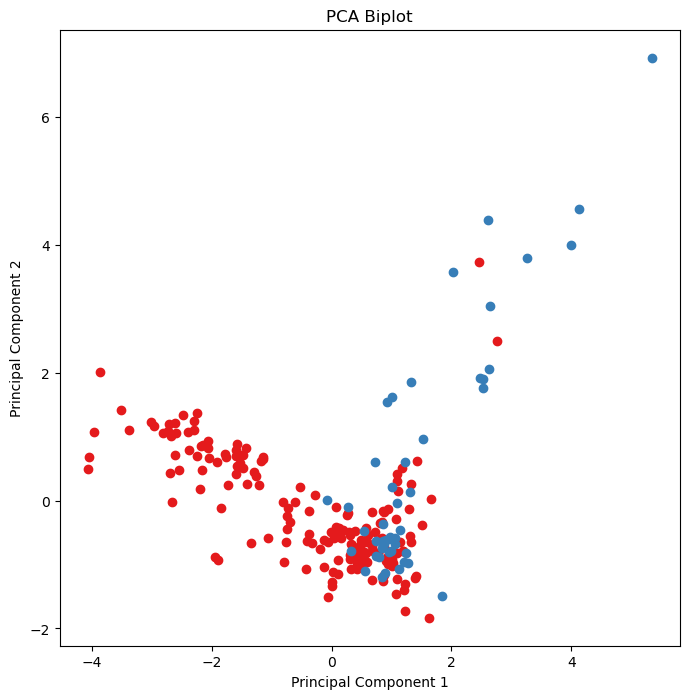

In [510]:
# Plot the transformed data and the loadings
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(x_pca_f.shape[0]):
    ax.scatter(x_pca_f[i, 0], x_pca_f[i, 1], color=plt.cm.Set1(y[i] / 10.))

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Biplot')
plt.savefig("PCA fisher2.png")
plt.show()

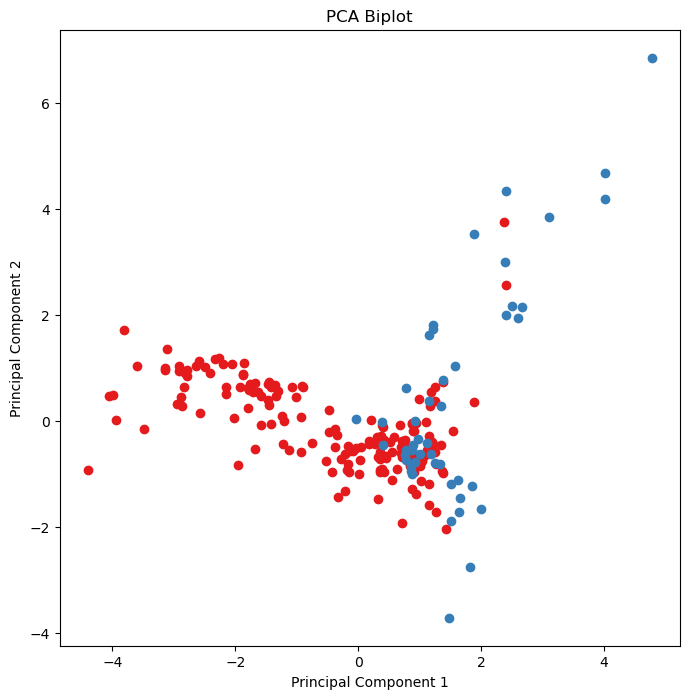

In [511]:
# Plot the transformed data and the loadings
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(x_pca_p.shape[0]):
    ax.scatter(x_pca_p[i, 0], x_pca_p[i, 1], color=plt.cm.Set1(y[i] / 10.))

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Biplot')
plt.savefig("PCA pearson2.png")
plt.show()

In [484]:
# Train pearson features with PCA
#1- Random forest
rf_p_pca = RandomForestClassifier()
rf_p_pca = OneVsRestClassifier(rf_p_pca)
average_accuracy_rf_p_pca,average_fbeta_rf_p_pca,average_precision_rf_p_pca,average_recall_rf_p_pca, rf_p_pca, rf_p_pca_report, y_test_rf_p_pca, y_score_rf_p_pca,true_labels_rf_p_pca, predicted_labels_rf_p_pca = train_kfold(rf_p_pca,x_pca_p, y)

In [485]:
print(average_accuracy_rf_p_pca,average_fbeta_rf_p_pca,average_precision_rf_p_pca,average_recall_rf_p_pca)

0.87 0.84 0.84 0.84


In [504]:
# Train fisher features with PCA
#1- Random forest
rf_f_pca = RandomForestClassifier()
rf_f_pca = OneVsRestClassifier(rf_f_pca)
average_accuracy_rf_f_pca,average_fbeta_rf_f_pca,average_precision_rf_f_pca,average_recall_rf_f_pca, rf_f_pca, rf_f_pca_report, y_test_rf_f_pca, y_score_rf_f_pca,true_labels_rf_f_pca, predicted_labels_rf_f_pca = train_kfold(rf_f_pca,x_pca_f, y)

In [505]:
print(average_accuracy_rf_f_pca,average_fbeta_rf_f_pca,average_precision_rf_f_pca,average_recall_rf_f_pca)

0.89 0.87 0.89 0.86


In [488]:
# Train pearson features with pca
nb_p_pca = GaussianNB()
nb_p_pca = OneVsRestClassifier(nb_p_pca)
average_accuracy_nb_p_pca,average_fbeta_nb_p_pca,average_precision_nb_p_pca,average_recall_nb_p_pca, nb_p_pca, nb_p_pca_report,y_test_nb_p_pca, y_score_nb_p_pca,true_labels_nb_p_pca, predicted_labels_nb_p_pca = train_kfold(nb_p_pca,x_pca_p, y)

In [489]:
print(average_accuracy_nb_p_pca,average_fbeta_nb_p_pca,average_precision_nb_p_pca,average_recall_nb_p_pca)

0.8 0.78 0.81 0.76


In [506]:
# Train fisher features with pca
nb_f_pca = GaussianNB()
nb_f_pca = OneVsRestClassifier(nb_f_pca)
average_accuracy_nb_f_pca,average_fbeta_nb_f_pca,average_precision_nb_f_pca,average_recall_nb_f_pca, nb_f_pca, nb_f_pca_report,y_test_nb_f_pca, y_score_nb_f_pca,true_labels_nb_f_pca, predicted_labels_nb_f_pca = train_kfold(nb_f_pca,x_pca_f, y)

In [507]:
print(average_accuracy_nb_f_pca,average_fbeta_nb_f_pca,average_precision_nb_f_pca,average_recall_nb_f_pca)

0.82 0.8 0.84 0.78


In [535]:
#save the models
pickle.dump(nb_p_pca, open('model_Naive_pearsonpca.pkl', 'wb'))
pickle.dump(nb_f_pca, open('model_Naive_fisherpca.pkl', 'wb'))
pickle.dump(rf_p_pca, open('model_RandomForest_pearsonpca.pkl', 'wb'))
pickle.dump(rf_f_pca, open('model_RandomForest_fisherpca.pkl', 'wb'))

In [536]:
# save the scaler data
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [537]:
# save the scaler data
with open('pearsonscaler.pkl','wb') as file:
    pickle.dump(p_scaler,file)

In [538]:
# save the scaler data
with open('fisherscaler.pkl','wb') as file:
    pickle.dump(f_scaler,file)

In [35]:
# save the scaler data
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [539]:
#save the encoder data
with open('encoder.pkl','wb') as file:
    pickle.dump(enc,file)

In [540]:
#save the pca data
with open('pca_fisher.pkl','wb') as file:
    pickle.dump(pca_f,file)

In [541]:
#save the pca data
with open('pca_pearson.pkl','wb') as file:
    pickle.dump(pca_p,file)